## Лабораторная работа №3

### Характеристики ноутбука:

L3 cache size: 6144Kb | 
L3 ways count: 12 | 
L3 line size: 64b

In [86]:
nsizes = [1000, 1013, 1023, 1024, 1025, 1030, 1040, 1041, 1050, 1070, 1100]

In [106]:
def parseValgrind(filename):
    with open(filename, "r") as f:
        for line in f.readlines():
            if line.find("LLd misses:") == -1:
                continue
            toks = line.strip().split()
            misses = int(toks[3].replace(",", ""))
            return misses
        raise Exception("not found LLd misses!")
        

def parseValgrindResult(sizes):
    results = {"simple": [], "block": [], "swapped": []}
    for n in sizes:
        stat = CacheGrindStat(n, "MultSimple")
        stat.misses = parseValgrind("tests/results/" + str(n) + "-simple.vg.txt")
        results["simple"].append(stat)
        stat = CacheGrindStat(n, "MultSimpleBlock")
        stat.misses = parseValgrind("tests/results/" + str(n) + "-block.vg.txt")
        results["block"].append(stat)
        stat = CacheGrindStat(n, "MultSwappedLoops")
        stat.misses = parseValgrind("tests/results/" + str(n) + "-swapped-loops.vg.txt")
        results["swapped"].append(stat)
    return results

In [116]:
%pylab inline
from matplotlib.ticker import ScalarFormatter

def drawCacheMisses(name, cgStates):
    
    xs = [stat.n for stat in cgStates]
    y_cg = [stat.misses for stat in cgStates]
    
    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(1,1,1)
    ax.plot(xs, y_cg, marker='o', linestyle='--', color='blue', label="valgrind")
    ax.set_title(name, fontsize=25)
    ax.set_ylabel("Cache Misses", fontsize=20)
    ax.set_xlabel("Matrix Size", fontsize=20)

    plt.legend(loc="upper left")
    plt.show()

Populating the interactive namespace from numpy and matplotlib


In [114]:
vgstates = parseValgrindResult(nsizes)

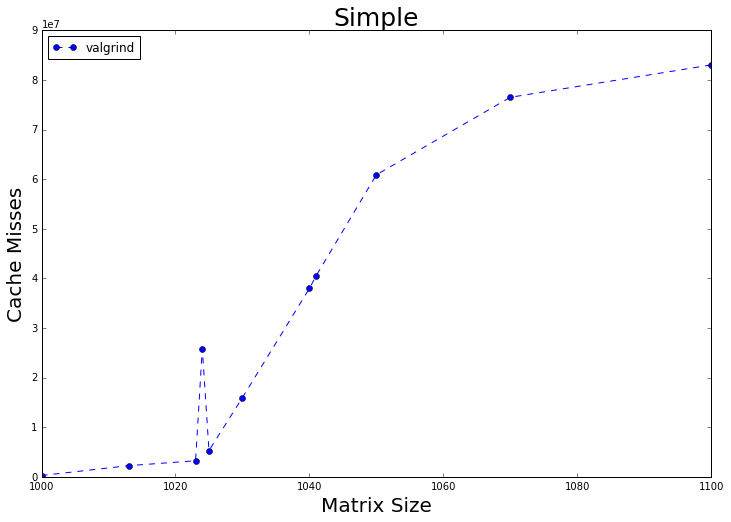

In [117]:
drawCacheMisses("Simple", vgstates["simple"])

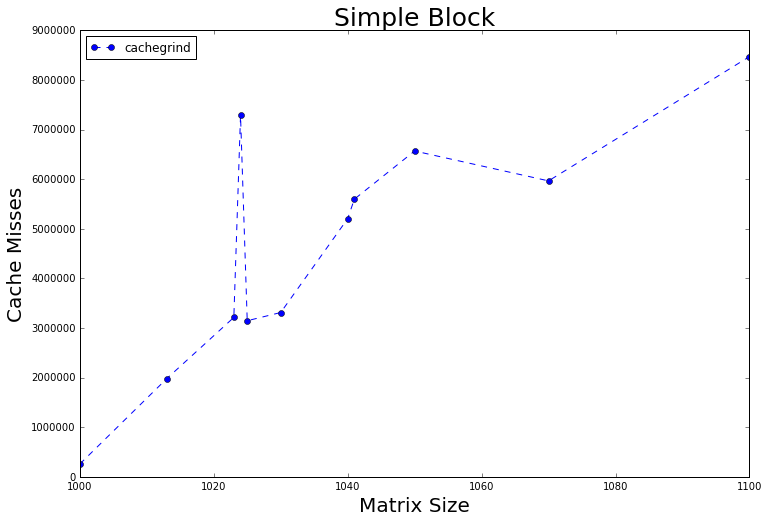

In [100]:
drawCacheMisses("Simple Block", vgstates["block"])

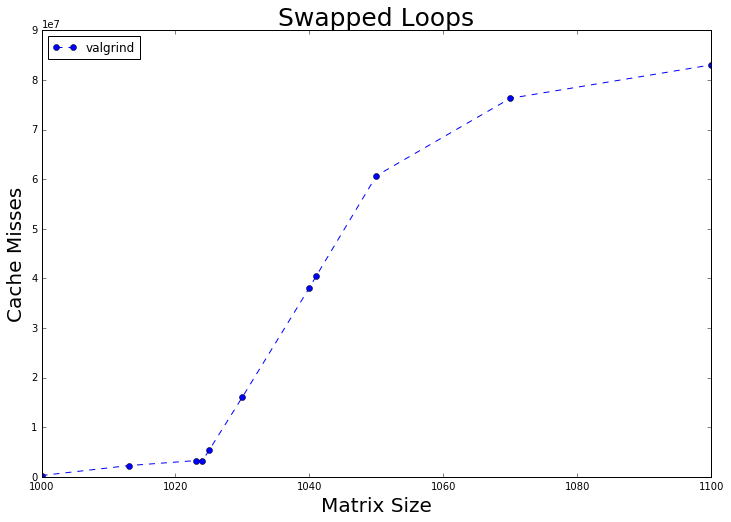

In [118]:
drawCacheMisses("Swapped Loops", vgstates["swapped"])